# Project 3

In this project, you will perform a logistic regression on the admissions data we've been working with in projects 1 and 2.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np


In [2]:
df_raw = pd.read_csv("../assets/admissions.csv")
df = df_raw.dropna() 
df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


## Part 1. Frequency Tables

#### 1. Let's create a frequency table of our variables relative to whether someone got admitted or not. Think in terms of for a certain prestige level, how many people got admitted and didnt get admitted

In [3]:
# frequency table for prestige and whether or not someone was admitted

#can create two groupby functions
print "count by prestige"
print df.groupby(df.prestige).admit.count()

print "sum by prestige"
print df.groupby(df.prestige).admit.sum()

count by prestige
prestige
1.0     61
2.0    148
3.0    121
4.0     67
Name: admit, dtype: int64
sum by prestige
prestige
1.0    33
2.0    53
3.0    28
4.0    12
Name: admit, dtype: int64


In [4]:
#or can create a frequency table from scratch

counter = 0

temp = []
temp2 = []
temp3 = []

for x in df.prestige.unique():
    temp.append(x)
    temp2.append(df[df.prestige == x].admit.sum())
    temp3.append(df[df.prestige == x].admit.count())
    print x
    
    
print temp
print temp2
print temp3

3.0
1.0
4.0
2.0
[3.0, 1.0, 4.0, 2.0]
[28, 33, 12, 53]
[121, 61, 67, 148]


In [5]:
table = pd.DataFrame(columns=['prestige','admit_sum','admit_count'])
table

,prestige,admit_sum,admit_count


In [6]:
#frequency table
table.prestige = temp
table.admit_sum = temp2
table.admit_count = temp3
table['pct_admit'] = table.admit_sum / table.admit_count
table

,prestige,admit_sum,admit_count,pct_admit
0,3.0,28,121,0.231405
1,1.0,33,61,0.540984
2,4.0,12,67,0.179104
3,2.0,53,148,0.358108


In [7]:
#or can create using the crosstab function
freq_table = pd.crosstab(df.admit, df.prestige)
freq_table.index=['not_admit','admitted']
freq_table

prestige,1.0,2.0,3.0,4.0
not_admit,28,95,93,55
admitted,33,53,28,12


## Part 2. Return of dummy variables

#### 2.1 Create class or dummy variables for prestige 

In [8]:
df = df.join(pd.get_dummies(df.prestige, prefix="prestige"))
df.ix[:,'prestige_1.0':]

,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1
5,0,1,0,0
6,1,0,0,0
7,0,1,0,0
8,0,0,1,0
9,0,1,0,0


#### 2.2 When modeling our class variables, how many do we need? 



Answer: We need to drop one of the variables to avoid colinearity

## Part 3. Hand calculating odds ratios

Develop your intuition about expected outcomes by hand calculating odds ratios.

In [9]:
cols_to_keep = ['admit', 'gre', 'gpa']
handCalc = df[cols_to_keep].join(df.ix[:, 'prestige_1.0':])
print handCalc.head()

   admit    gre   gpa  prestige_1.0  prestige_2.0  prestige_3.0  prestige_4.0
0      0  380.0  3.61             0             0             1             0
1      1  660.0  3.67             0             0             1             0
2      1  800.0  4.00             1             0             0             0
3      1  640.0  3.19             0             0             0             1
4      0  520.0  2.93             0             0             0             1


## crosstab prestige 1 admission 
# frequency table cutting prestige and whether or not someone was admitted


#### 3.1 Use the cross tab above to calculate the odds of being admitted to grad school if you attended a #1 ranked college

In [10]:
table[table.prestige == 1].pct_admit

1    0.540984
Name: pct_admit, dtype: float64

#### 3.2 Now calculate the odds of admission if you did not attend a #1 ranked college

In [11]:
#probability of admit if did not attend a #1 ranked college
float(handCalc[handCalc['prestige_1.0'] == 0].admit.sum()) / handCalc[handCalc['prestige_1.0'] == 0].admit.count()

0.2767857142857143

#### 3.3 Calculate the odds ratio

In [12]:
(float(handCalc[handCalc['prestige_1.0'] == 1].admit.sum()) / handCalc[handCalc['prestige_1.0'] == 1].admit.count()) / (float(handCalc[handCalc['prestige_1.0'] == 0].admit.sum()) / handCalc[handCalc['prestige_1.0'] == 0].admit.count())


1.9545214172395557

In [13]:
#Odds ratio for each prestige level
x = ['prestige_1.0', 'prestige_2.0', 'prestige_3.0', 'prestige_4.0']

for i in x:
    print i 
    print (float(handCalc[handCalc[i] == 1].admit.sum()) / handCalc[handCalc[i] == 1].admit.count()) / (float(handCalc[handCalc[i] == 0].admit.sum()) / handCalc[handCalc[i] == 0].admit.count())

prestige_1.0
1.95452141724
prestige_2.0
1.22149203999
prestige_3.0
0.651711924439
prestige_4.0
0.518460329929


#### 3.4 Write this finding in a sentenance: 

Answer: If you were admitted, the odds that you came from a prestige 1 college are 1.95:1

#### 3.5 Print the cross tab for prestige_4

In [14]:
freq_table[4.0]

not_admit    55
admitted     12
Name: 4.0, dtype: int64

#### 3.6 Calculate the OR 

In [32]:
y = ['prestige_4.0']

for i in y:
    print i 
    print (float(handCalc[handCalc[i] == 1].admit.sum()) / handCalc[handCalc[i] == 1].admit.count()) / (float(handCalc[handCalc[i] == 0].admit.sum()) / handCalc[handCalc[i] == 0].admit.count())

prestige_4.0
0.518460329929


#### 3.7 Write this finding in a sentence

Answer: If you were admitted, the odds that you came from a prestige 1 college are 0.52:1

## Part 4. Analysis

In [16]:
# create a clean data frame for the regression
cols_to_keep = ['admit', 'gre', 'gpa']
data = df[cols_to_keep].join(df.ix[:, 'prestige_2.0':])
data.head()

,admit,gre,gpa,prestige_2.0,prestige_3.0,prestige_4.0
0,0,380.0,3.61,0,1,0
1,1,660.0,3.67,0,1,0
2,1,800.0,4.00,0,0,0
3,1,640.0,3.19,0,0,1
4,0,520.0,2.93,0,0,1


We're going to add a constant term for our Logistic Regression. The statsmodels function we're going to be using requires that intercepts/constants are specified explicitly.

In [17]:
# manually add the intercept
data['intercept'] = 1.0

#### 4.1 Set the covariates to a variable called train_cols

In [70]:
cols_to_train = ['gre', 'gpa','prestige_2.0','prestige_3.0', 'prestige_4.0','intercept']

data_train = data[cols_to_train]


In [71]:
data_train.head()

,gre,gpa,prestige_2.0,prestige_3.0,prestige_4.0,intercept
0,380.0,3.61,0,1,0,1.0
1,660.0,3.67,0,1,0,1.0
2,800.0,4.00,0,0,0,1.0
3,640.0,3.19,0,0,1,1.0
4,520.0,2.93,0,0,1,1.0


#### 4.2 Fit the model

In [61]:
import statsmodels.api as sm
lm = sm.Logit()


TypeError: __init__() takes exactly 3 arguments (1 given)

In [72]:
lm = sm.Logit(data['admit'], data_train)
lm_result = lm.fit()

Optimization terminated successfully.
         Current function value: 0.573854
         Iterations 6


#### 4.3 Print the summary results

In [73]:
print lm_result.summary()


                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                            5
Date:                Sun, 07 May 2017   Pseudo R-squ.:                 0.08166
Time:                        18:06:41   Log-Likelihood:                -227.82
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 1.176e-07
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
gre              0.0022      0.001      2.028      0.043      7.44e-05     0.004
gpa              0.7793      0.333      2.344      0.019         0.128     1.431
prestige_2.0    -0.6801      0.317     -2.14

#### 4.4 Calculate the odds ratios of the coeffiencents and their 95% CI intervals

hint 1: np.exp(X)

hint 2: conf['OR'] = params
        
           conf.columns = ['2.5%', '97.5%', 'OR']

In [74]:
np.exp(lm_result.params)

gre             1.002221
gpa             2.180027
prestige_2.0    0.506548
prestige_3.0    0.262192
prestige_4.0    0.211525
intercept       0.020716
dtype: float64

In [75]:
conf = lm_result.conf_int()
conf['OR'] = lm_result.params
conf.columns = ['2.5%', '97.5%', 'OR']
np.exp(conf)

,2.5%,97.5%,OR
gre,1.000074,1.004372,1.002221
gpa,1.136120,4.183113,2.180027
prestige_2.0,0.272168,0.942767,0.506548
prestige_3.0,0.133377,0.515419,0.262192
prestige_4.0,0.093329,0.479411,0.211525
intercept,0.002207,0.194440,0.020716


#### 4.5 Interpret the OR of Prestige_2

Answer: the odds ratio that the individual was admitted from a prestige 2 school is 0.5:1

#### 4.6 Interpret the OR of GPA

Answer: As GPA increases by 1.0, the odds ratio that they were admitted increases by 2.18:1

## Part 5: Predicted probablities


As a way of evaluating our classifier, we're going to recreate the dataset with every logical combination of input values. This will allow us to see how the predicted probability of admission increases/decreases across different variables. First we're going to generate the combinations using a helper function called cartesian (above).

We're going to use np.linspace to create a range of values for "gre" and "gpa". This creates a range of linearly spaced values from a specified min and maximum value--in our case just the min/max observed values.

In [76]:
def cartesian(arrays, out=None):
    """
    Generate a cartesian product of input arrays.
    Parameters
    ----------
    arrays : list of array-like
        1-D arrays to form the cartesian product of.
    out : ndarray
        Array to place the cartesian product in.
    Returns
    -------
    out : ndarray
        2-D array of shape (M, len(arrays)) containing cartesian products
        formed of input arrays.
    Examples
    --------
    >>> cartesian(([1, 2, 3], [4, 5], [6, 7]))
    array([[1, 4, 6],
           [1, 4, 7],
           [1, 5, 6],
           [1, 5, 7],
           [2, 4, 6],
           [2, 4, 7],
           [2, 5, 6],
           [2, 5, 7],
           [3, 4, 6],
           [3, 4, 7],
           [3, 5, 6],
           [3, 5, 7]])
    """

    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in xrange(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out

In [77]:
# instead of generating all possible values of GRE and GPA, we're going
# to use an evenly spaced range of 10 values from the min to the max 
gres = np.linspace(data['gre'].min(), data['gre'].max(), 10)
print gres
# array([ 220.        ,  284.44444444,  348.88888889,  413.33333333,
#         477.77777778,  542.22222222,  606.66666667,  671.11111111,
#         735.55555556,  800.        ])
gpas = np.linspace(data['gpa'].min(), data['gpa'].max(), 10)
print gpas
# array([ 2.26      ,  2.45333333,  2.64666667,  2.84      ,  3.03333333,
#         3.22666667,  3.42      ,  3.61333333,  3.80666667,  4.        ])


# enumerate all possibilities
combos = pd.DataFrame(cartesian([gres, gpas, [1, 2, 3, 4], [1.]]))

[ 220.          284.44444444  348.88888889  413.33333333  477.77777778
  542.22222222  606.66666667  671.11111111  735.55555556  800.        ]
[ 2.26        2.45333333  2.64666667  2.84        3.03333333  3.22666667
  3.42        3.61333333  3.80666667  4.        ]


In [100]:
combos.columns = ['gres', 'gpas', 'prestige', 'intercept']


,gres,gpas,prestige,intercept
0,220.0,2.260000,1.0,1.0
1,220.0,2.260000,2.0,1.0
2,220.0,2.260000,3.0,1.0
3,220.0,2.260000,4.0,1.0
4,220.0,2.453333,1.0,1.0
5,220.0,2.453333,2.0,1.0
6,220.0,2.453333,3.0,1.0
7,220.0,2.453333,4.0,1.0
8,220.0,2.646667,1.0,1.0
9,220.0,2.646667,2.0,1.0


#### 5.1 Recreate the dummy variables

In [106]:
# recreate the dummy variables

# keep only what we need for making predictions
#combos = combos.join(pd.get_dummies(combos.prestige, prefix="prestige"))
combos.head()

col_to_keep = ['gres', 'gpas','prestige_2.0','prestige_3.0', 'prestige_4.0','intercept']

combos_train = combos[col_to_keep]
combos_train.head()

,gres,gpas,prestige_2.0,prestige_3.0,prestige_4.0,intercept
0,220.0,2.260000,0,0,0,1.0
1,220.0,2.260000,1,0,0,1.0
2,220.0,2.260000,0,1,0,1.0
3,220.0,2.260000,0,0,1,1.0
4,220.0,2.453333,0,0,0,1.0


#### 5.2 Make predictions on the enumerated dataset

In [117]:
predictions = lm_result.predict(combos_train)
print predictions[-4:]
print combos_train[-4:]

[ 0.73403998  0.58299512  0.41983282  0.36860803]
      gres  gpas  prestige_2.0  prestige_3.0  prestige_4.0  intercept
396  800.0   4.0             0             0             0        1.0
397  800.0   4.0             1             0             0        1.0
398  800.0   4.0             0             1             0        1.0
399  800.0   4.0             0             0             1        1.0


#### 5.3 Interpret findings for the last 4 observations

Answer: The last four observations in the dataset are identical outside of their prestige ranking. The probability that the individuals gets into school decreases as the prestige level goes from 1 (prob of .734) to 4 (prob of .37)

## Bonus

Plot the probability of being admitted into graduate school, stratified by GPA and GRE score.

In [119]:
combos_train['prediction'] = predictions

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


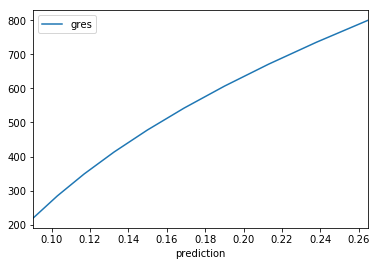

In [134]:
combos_train[(combos_train['prestige_2.0'] == 1) & (combos_train['gpas'] == 2.26)].plot(x='prediction', y='gres')

